In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import scipy

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import plotly.express as px

from datetime import datetime
from scipy import stats

#Set Display options
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

pd.options.display.float_format = '{:.2f}'.format


In [2]:
all_players = pd.read_csv(r"./data/2019-20/all_players.csv" , parse_dates= ["news_added"]) 
player_gameweek_history = pd.read_csv(r"./data/2019-20/player_past_history/merged_data.csv") 
all_teams = pd.read_csv(r"./data/2019-20/all_teams.csv")
all_events = pd.read_csv(r"./data/2019-20/all_events.csv" , parse_dates= ["deadline_time"])


In [3]:
def get_SMA(player_id , gw_period):
    player_data = player_gameweek_history[player_gameweek_history.player_id == player_id].set_index("gameweek_id")
    player_data = player_data[['total_points' , 'was_home' , 'opponent_strength', 'web_name']]

    player_name = player_data.iloc[0]['web_name']
    total_points = player_data.iloc[:,0]
    was_home = player_data.iloc[:,1]
    opponent_strength = player_data.iloc[:,2]

    
    # List to store moving average results
    SMA = list(range(0, len(total_points) - gw_period))
    SMA2 = list(range(0, len(total_points) - gw_period))

    # Compute moving average
    for ii in range(len(SMA)):
        # Previous gw index
        index = range(ii, ii + gw_period)
        # Get data for previous gw
        prev_gw = total_points.iloc[index]
        prev_gw2 = opponent_strength.iloc[index]

        # Sum previous gw
        summation = np.sum(prev_gw)
        summation2 = np.sum(prev_gw2)

        # Get average
        avg = summation/gw_period
        avg2 = summation2/gw_period
        # Save results to list
        SMA[ii] = avg
        SMA2[ii] = avg2
         
    # Define column label
    label = f"average_TP"
    label2 = f"average_OS"

    
    # Get corresponding gw for moving_avg
    gameweeks = total_points.index[gw_period:]
    gameweeks2 = opponent_strength.index[gw_period:]
    
    # Convert list into Pandas Series
    SMA = pd.Series(SMA, name = label, index = gameweeks)
    SMA2 = pd.Series(SMA2, name = label2, index = gameweeks2)

    player_data = pd.concat([player_data, SMA , SMA2] , axis = 1)
    player_data.dropna(inplace = True)

    return player_data , player_name

In [4]:
def correlation_graph(player_data , player_name):
    y = player_data['total_points']
    x = player_data['average_TP']

    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)

    print("slope: %f    intercept: %f" % (slope, intercept))
    print("R-squared: %f" % r_value**2)
    print("")

    plt.plot(x, y, 'o', label='original data')
    plt.plot(x, intercept + slope*x, 'r', label='fitted line')
    plt.title(player_name)
    plt.legend()
    plt.show()


slope: 0.072261    intercept: 0.727004
R-squared: 0.001332



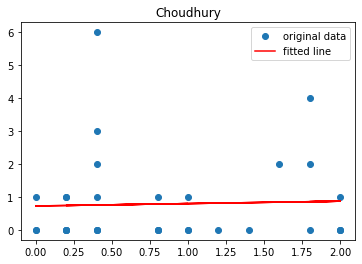

In [5]:
def main():
    player_data , player_name = get_SMA(180,5)
    correlation_graph(player_data , player_name)

main()

In [6]:
df , name = get_SMA(100,5)
df

,total_points,was_home,opponent_strength,web_name,average_TP,average_OS
gameweek_id,,,,,,
6,3,True,2,Hendrick,1.60,3.60
7,2,False,2,Hendrick,2.20,3.40
8,10,True,3,Hendrick,2.60,3.00
9,1,False,3,Hendrick,4.40,2.80
10,1,True,4,Hendrick,4.60,2.40
11,2,False,3,Hendrick,3.40,2.80
12,3,True,2,Hendrick,3.20,3.00
13,3,False,3,Hendrick,3.40,3.00
14,2,True,3,Hendrick,2.00,3.00
